<table>
        <td>
        <td><img src="https://educacioncontinua.anahuac.mx/cdn/shop/files/Logo_CentrodeEducacionContinua-01_300x300.png?v=1727301783" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue"> Machine Learning  </p> Clasificación   </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Diplomado </p></tp>
            <tp><p style="font-size:115%;text-align:center"> 2025-2</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>



## <FONT SIZE=4 COLOR="blue"> 1. Librerías de trabajo </FONT>

In [1]:
# Manipulación de data.frames
import pandas       as pd
import numpy        as np

# Librerías para Gráficos
import matplotlib.pyplot  as plt
import seaborn            as sns
import plotly.express     as px

# Librerías para datos de entrenamiento y prueba
from sklearn.model_selection    import train_test_split

# Para preprocesamiento/escalar los datos
from sklearn.preprocessing      import StandardScaler, MinMaxScaler

# modelos de clasificación
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.linear_model       import LogisticRegression
from sklearn.tree               import DecisionTreeClassifier

# Métricas de evaluación
from sklearn                    import metrics
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from imblearn.metrics           import specificity_score

# Optimización de hiperparámetros
from sklearn.model_selection    import GridSearchCV

# Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

## <FONT SIZE=4 COLOR="blue"> 2. Contexto del problema </FONT>

Cuando vamos a explorar los datos. Lo primero que debemos entender es el contexto de los datos.

El conjunto de datos corresponde a una muestra de 2.000 organizaciones del sector industrial y comercial que actualmente consumen energía eléctrica para el desarrollo de sus actividades productivas.

La entidad proveedora de energía está desarrollando un programa de eficiencia energética orientado a reducir costos operativos y mejorar el desempeño ambiental de sus clientes. Para ello, se han registrado diferentes características de cada usuario, tales como su consumo mensual de energía, costos asociados, condiciones climáticas del lugar de operación, antigüedad del equipamiento, presencia de mantenimiento preventivo y la actividad económica principal del sitio.

A partir de estos datos se ha estimado si cada cliente presenta o no interés en implementar medidas de eficiencia energética, lo cual se expresa como una variable binaria. El propósito analítico de este caso es construir un modelo predictivo que permita identificar de manera anticipada a los clientes con mayor probabilidad de estar interesados en el programa, con el fin de priorizar acciones comerciales y maximizar el impacto energético del proyecto.

 - 2000 registros

 - 10 variables independientes

 - 1 variable objetivo dicotómica (Interes)

 | Variable             | Tipo     | Descripción                                      |
| -------------------- | -------- | ------------------------------------------------ |
| Consumo_kWh          | Numérica | Consumo mensual estimado de energía              |
| CostoEnergia_USD     | Numérica | Costo de energía mensual                         |
| TempPromedio_C       | Numérica | Temperatura promedio del sitio                   |
| HorasPico            | Numérica | Horas diarias en tarifa pico                     |
| PotenciaMax_kW       | Numérica | Máxima potencia requerida                        |
| EmisionesCO2_tn      | Numérica | Emisiones asociadas                              |
| SectorIndustrial     | Binaria  | 1 = Industrial / 0 = Comercial                   |
| MantenimientoPrev    | Binaria  | Si ha tenido mantenimiento preventivo            |
| EdadEquipo_anios     | Numérica | Antigüedad del equipamiento                      |
| **Interes (Target)** | Binaria  | 1 = Interés en programa de eficiencia energética |


La variable Interes se generó en función de alto consumo, equipos viejos, falta de mantenimiento y pertenencia a sector industrial.



## <FONT SIZE=4 COLOR="blue"> 3. Importar los datos </FONT>

Lo primero que haremos es importar los datos que están en el siguiente link o pueden ser descargados de la página de Kaggle.

https://raw.githubusercontent.com/Fabian830348/cursos/refs/heads/master/Diplomado/datos_energia.csv

In [3]:
energia = pd.read_csv("https://raw.githubusercontent.com/Fabian830348/cursos/refs/heads/master/Diplomado/datos_energia.csv")

La exploración de los datos ya la hicimos en el Notebook_3 (revisar)

# <FONT SIZE=5 COLOR="Purple"> 4. Modelo KNN </FONT>

              precision    recall  f1-score   support

           0       0.63      0.62      0.63       295
           1       0.64      0.65      0.64       305

    accuracy                           0.64       600
   macro avg       0.64      0.64      0.64       600
weighted avg       0.64      0.64      0.64       600



,metricas,values
0,accuracy,0.636667
1,recall,0.649180
2,specificidad,0.623729
3,precision,0.640777
4,f1,0.644951


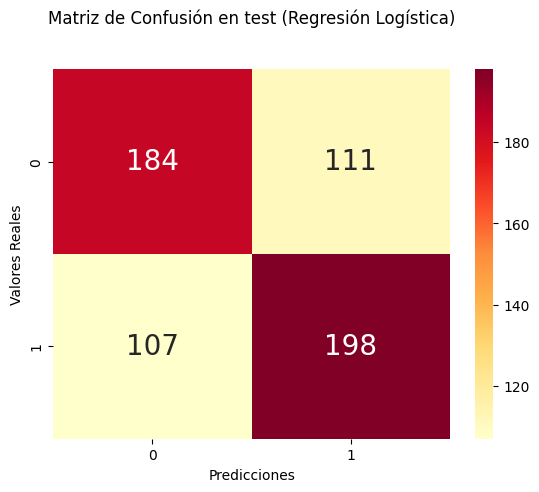

In [17]:
# 1. identificar las variables
y = energia["Interes"]
X = energia.drop("Interes", axis=1)

# 2. Conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 123,
                                                    test_size = 0.3)

# 3. Escalar los datos
escalar = StandardScaler()
X_train_s = escalar.fit_transform(X_train)
X_test_s = escalar.transform(X_test)

# 4. Definir el modelo de Regresión logística
modelo_knn = KNeighborsClassifier()

# 5. Entrenar el modelo
modelo_knn.fit(X_train_s,y_train)

# 6. Predicciones y matriz de confusión
y_pred = modelo_knn.predict(X_test_s)
MC= confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión en test (Regresión Logística)', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

print(classification_report(y_test, y_pred))

# 7. Métricas
# nombre de las métricas
metrics=["accuracy", "recall" , "specificidad", "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred),
          recall_score(y_test,y_pred),
          specificity_score(y_test,y_pred),
          precision_score(y_test,y_pred),
          f1_score(y_test,y_pred)]
pd.DataFrame({"metricas": metrics , "values" : values})

# <FONT SIZE=5 COLOR="Purple"> 5. Regresión Logística </FONT>

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       295
           1       0.69      0.67      0.68       305

    accuracy                           0.68       600
   macro avg       0.68      0.68      0.68       600
weighted avg       0.68      0.68      0.68       600



,metrics,values
0,accuracy,0.681667
1,recall,0.672131
2,specificidad,0.691525
3,precision,0.692568
4,f1,0.682196


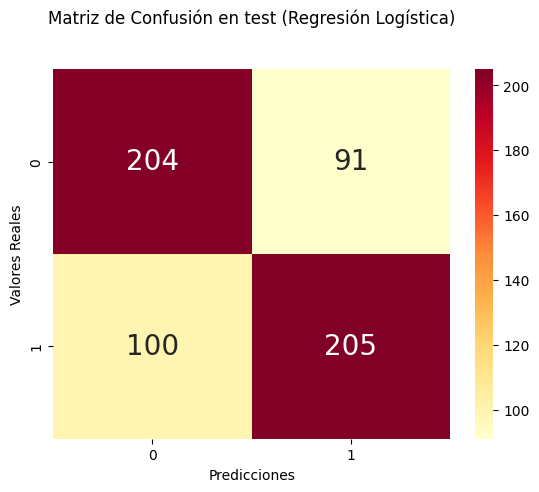

In [15]:
# 1. identificar las variables
y = energia["Interes"]
X = energia.drop("Interes", axis=1)

# 2. Conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 123,
                                                    test_size = 0.3)

# 3. Escalar los datos
escalar = StandardScaler()
X_train_s = escalar.fit_transform(X_train)
X_test_s = escalar.transform(X_test)

# 4. Definir el modelo de Regresión logística
modelo_reglog = LogisticRegression()

# 5. Entrenar el modelo
modelo_reglog.fit(X_train_s,y_train)

# 6. Predicciones y matriz de confusión
y_pred = modelo_reglog.predict(X_test_s)
MC= confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión en test (Regresión Logística)', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

print(classification_report(y_test, y_pred))

# 7. Métricas
# nombre de las métricas
metrics=["accuracy", "recall" , "specificidad", "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred),
          recall_score(y_test,y_pred),
          specificity_score(y_test,y_pred),
          precision_score(y_test,y_pred),
          f1_score(y_test,y_pred)]
pd.DataFrame({"metrics": metrics , "values" : values})


# <FONT SIZE=5 COLOR="Purple"> 6. Árboles de Decisión </FONT>

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       295
           1       0.65      0.61      0.63       305

    accuracy                           0.63       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.63      0.63      0.63       600



,metrics,values
0,accuracy,0.633333
1,recall,0.606557
2,specificidad,0.661017
3,precision,0.649123
4,f1,0.627119


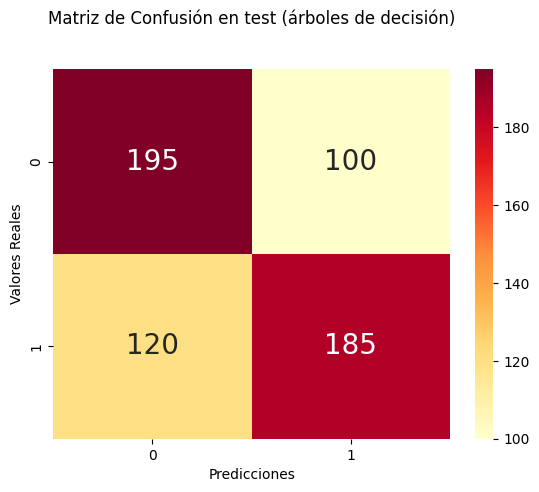

In [19]:
# 1. identificar las variables
y = energia["Interes"]
X = energia.drop("Interes", axis=1)

# 2. Conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 123,
                                                    test_size = 0.3)

# 3. Escalar los datos  Comentarios
# escalar = StandardScaler()
# X_train_s = escalar.fit_transform(X_train)
# X_test_s = escalar.transform(X_test)

# 4. Definir el modelo de Arboles de Decisión
modelo_tree = DecisionTreeClassifier()

# 5. Entrenar el modelo
modelo_tree.fit(X_train,y_train)

# 6. Predicciones y matriz de confusión
from sklearn import metrics
y_pred = modelo_tree.predict(X_test)
MC= metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(MC),                    # data.frame
                annot=True,                          # colocar números de las cajitas
                annot_kws = {'size':20},             # tamaño de la letra
                cmap="YlOrRd",                       # color de la letra 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu'
                fmt='g')                             # para que salgan los número no : notación científica
plt.title('Matriz de Confusión en test (árboles de decisión)', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

print(classification_report(y_test, y_pred))

# 7. Métricas
# nombre de las métricas
metrics=["accuracy", "recall" , "specificidad", "precision", "f1"]
# valores
values = [accuracy_score(y_test,y_pred),
          recall_score(y_test,y_pred),
          specificity_score(y_test,y_pred),
          precision_score(y_test,y_pred),
          f1_score(y_test,y_pred)]
pd.DataFrame({"metrics": metrics , "values" : values})

# <FONT SIZE=5 COLOR="Purple"> 7. Validar el modelo </FONT>

In [28]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline        import make_pipeline

pipeline = make_pipeline(StandardScaler(), modelo_reglog)

#kfold_validacion = KFold(10)                              # divide los datos en 10 pliegues.
resultados = cross_val_score(pipeline,                     # modelo aplicado
                             X,                            # conjunto de predictores
                             y,                            # variable de respuesta
                             cv = 10,                       # número de divisiones en cross-validation.
                             scoring = "accuracy")         # se puede escoger la métrica.
print(resultados)                                          # para ver la variable resultados.
resultados.mean()

[0.69  0.62  0.695 0.715 0.7   0.74  0.68  0.705 0.56  0.66 ]


np.float64(0.6765000000000001)

# <FONT SIZE=5 COLOR="Purple"> 7. Guardar el modelo </FONT>

In [29]:
from joblib import dump, load

In [30]:
dump(escalar, "escalar.pkl")
dump(modelo_reglog, "modelo_reglog.pkl")

['modelo_reglog.pkl']

Para cargarlos

In [24]:
escalar = load("escalar.pkl")
modelo_reglog = load("modelo_reglog.pkl")

Con esto podemos hacer predicciones

# <FONT SIZE=5 COLOR="Purple"> 8. Predicción con el Modelo </FONT>

El objetivo de los modelos (cuando son eficientes) es poder hacer algunas predicciones

 | Variable             | Valor     | Descripción                                      |
| -------------------- | -------- | ------------------------------------------------ |
| Consumo_kWh          | 346.25 | Consumo mensual estimado de energía              |
| CostoEnergia_USD     | 228.20 | Costo de energía mensual                         |
| TempPromedio_C       | 28.17 | Temperatura promedio del sitio                   |
| HorasPico            | 3.49 | Horas diarias en tarifa pico                     |
| PotenciaMax_kW       | 84.25 | Máxima potencia requerida                        |
| EmisionesCO2_tn      | 2.12 | Emisiones asociadas                              |
| SectorIndustrial     | 1  | 1 = Industrial / 0 = Comercial                   |
| MantenimientoPrev    | 0  | Si ha tenido mantenimiento preventivo            |
| EdadEquipo_anios     | 15.44 | Antigüedad del equipamiento                      |
| **Interes (Target)** | ??  | Interés en programa de eficiencia energética |

346.25	228.20	28.17	3.49	84.25	2.12	1	0	15.44

In [25]:
X_new = [346.25,	228.20,	28.17,	3.49,	84.25,	2.12,	1,	0,	15.44	]

In [26]:
# usamos la función escalar.transform
X_new = np.array([[346.25,	228.20,	28.17,	3.49,	84.25,	2.12,	1,	0,	15.44	]])
X_new_s = escalar.transform(X_new)
X_new_s

array([[-0.08053331, -0.34276276,  0.10729464, -0.43242162,  0.19470069,
        -0.49267525,  0.99288247, -0.98722446,  0.88401063]])

In [27]:
modelo_reglog.predict(X_new_s)

array([1])

Ahora, qué sucede si quiero hacer varias predicciones

In [31]:
nuevos_100 = pd.read_csv("https://raw.githubusercontent.com/Fabian830348/cursos/refs/heads/master/Diplomado/datos_prediccion_100.csv")

In [32]:
nuevos_100.head()

,Consumo_kWh,CostoEnergia_USD,TempPromedio_C,HorasPico,PotenciaMax_kW,EmisionesCO2_tn,SectorIndustrial,MantenimientoPrev,EdadEquipo_anios
0,247.20,353.78,32.60,5.93,112.44,3.74,0,1,6.42
1,453.09,50.01,23.15,2.75,69.14,2.85,1,1,3.63
2,382.48,362.85,39.99,3.09,69.96,2.41,0,1,17.35
3,205.62,499.80,32.49,5.63,52.80,3.98,1,0,2.83
4,297.32,267.70,27.44,4.12,80.08,4.41,1,1,1.98


In [34]:
# escalamos los datos
nuevos_100_s = escalar.transform(nuevos_100 )

# hacemos las predicciones
predicciones = modelo_reglog.predict(nuevos_100_s)

# adicionamos las predicciones
nuevos_100["Prediccion_interes"] = predicciones

#mostrar los datos
nuevos_100.head()

,Consumo_kWh,CostoEnergia_USD,TempPromedio_C,HorasPico,PotenciaMax_kW,EmisionesCO2_tn,SectorIndustrial,MantenimientoPrev,EdadEquipo_anios,Prediccion_interes
0,247.20,353.78,32.60,5.93,112.44,3.74,0,1,6.42,0
1,453.09,50.01,23.15,2.75,69.14,2.85,1,1,3.63,0
2,382.48,362.85,39.99,3.09,69.96,2.41,0,1,17.35,1
3,205.62,499.80,32.49,5.63,52.80,3.98,1,0,2.83,0
4,297.32,267.70,27.44,4.12,80.08,4.41,1,1,1.98,0


Podemos exportar los resultados

In [36]:
nuevos_100.to_csv("nuevos_100_con_prediccion.csv", index=False)

# <FONT SIZE=5 COLOR="purple"> 7. Ejercicio en clase </FONT>



Este archivo tiene datos de tarjetas de crédito que se componen de una variable objetivo que es de naturaleza binaria (1 si se aprueba la solicitud de tarjeta de crédito, 0 si no) y algunas variables independientes sobre la demografía y el historial crediticio de los titulares de tarjetas de crédito.

Los datos para este trabajo se tomaron y modificaron de *kaggle* en la siguiente *url*.

https://www.kaggle.com/datasets/dansbecker/aer-credit-card-data?select=AER_credit_card_data.csv

Se anexan los datos como ***datos_credito*** y este trabajo se va a desarrollar con este conjunto.

```python
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/datos_credito.csv"
```

Cada fila representa una solicitud de tarjeta de crédito, cada columna contiene los atributos del solicitante:

- *tarjeta*: variable ficticia, 1 si se aprueba la solicitud de tarjeta de crédito, 0 si no

- *informes*: número de informes despectivos importantes.

- *edad*: Edad n años más doceavos de un año.

- *ingreso*: ingreso anual (dividido por 10,000).

- *participación*: relación entre el gasto mensual de la tarjeta de crédito y el ingreso anual.

- *gasto*: gasto medio mensual con tarjeta de crédito.

- *propietario*: 1 si es dueño de su casa, 0 si alquila.

- *selfemp*: 1 si es autónomo, 0 si no.

- *dependientes*: 1 + número de dependientes.

- *meses*: Meses viviendo en la dirección actual.

- *majorcards*: número de las principales tarjetas de crédito que se tienen.

- activo: Número de cuentas de crédito activas.

Según Greene (2003, p. 952) los dependientes equivalen a 1 + número de dependientes. Eso se describe arriba. Los autores del paquete “AER” en R creen que es el número de dependientes.

Algunas precisiones sobre las variables

- *Los informes promedio* (es decir, el número promedio de informes despectivos importantes) de los solicitantes que fueron aprobados es menor que el de los solicitantes que no fueron aprobados.

- *El ingreso promedio* (es decir, el ingreso anual promedio dividido por 10,000) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

- *La participación promedio* (es decir, la relación promedio entre el gasto mensual de la tarjeta de crédito y el ingreso anual) de los solicitantes que fueron aprobados es más alta que la de los solicitantes que no fueron aprobados.

- *El gasto promedio* (es decir, el gasto mensual promedio con tarjeta de crédito) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

- *El promedio de dependientes*(es decir, el número promedio de dependientes) de los solicitantes que fueron aprobados es menor que el de los solicitantes que no fueron aprobados.

- *El promedio de tarjetas principales* (es decir, el número promedio de las principales tarjetas de crédito) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

In [ ]:
# cargar los datos que están la dirección del github
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/datos_credito.csv"
credito = pd.read_csv(url, na_values=[" "])

In [ ]:
credito